# Titanic Data Exploration

## 项目背景

根据提供的泰坦尼克号 891 名乘客和船员的人口学数据和乘客基本信息，分析哪些因素使船上乘员的生还率更高。

* * *

## 变量识别

首先我们从原始数据集，可以分析得出所有字段的基本信息:

| 字段名 | 定义 | 数据类型 | 数据特征 | 备注 |
| ------------- |:-------------:| :-----: | :-----: | -----:
| PassengerId | 乘员编号 | 数字 | 连续 | 乘客的唯一标识
| Survival | 是否生还 | 数字 | 离散 |0 = 否, 1 = 是 |
| Pclass | 船票等级 | 数字 | 离散 |1：高级； 2：中级；3：下级 |
| Name | 姓名 | 字符 | 离散 |  |
| Sex | 性别 | 字符 | 离散 | male/female |
| Age | 年龄 | 数字 | 连续 |  |
| SibSp | 兄弟/姐妹辈分的亲属在船上的数量 | 数字 | 连续 |  |	
| Parch | 父母/子女辈分的亲属在船上的数量 | 数字 | 连续 |  |
| Ticket | 船票编号 | 字符 | 离散 |  |	
| Fare | 票价 | 数字 | 连续 |  |
| Cabin | 船舱号码 | 字符 | 离散 |  |	
| Embarked | 登船港口 | 字符 | 离散 | S:南安普顿(英国) C:瑟堡(法国) Q:昆士敦(爱尔兰) |

通过观察，我们发现只有Survival字段可能会因为其他变量的不同而改变，而且他变量都是属于每个个体固有的一些属性，因此我们选取Survival作为因变量，其他字段作为自变量进行进一步考察分析。

* * *

## 单元素分析

在确定了因/自变量之后，我们开始针对每个因变量字段进行单元素分析，以检查这些数据是否满足我们进一步分析的需要。单元素分析的主要目标是数据质量和分布等特征，我们根据数据本身的连续/离散特征来分别进行分析。

| 连续变量 | 离散变量|
| ------- | -----: 
| Age | Pclass |
| Fare | Name |
|  | Sex |
|  | Ticket |
|  | Cabin |
|  | Emarked |
|  | SibSp |
|  | Parch |

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


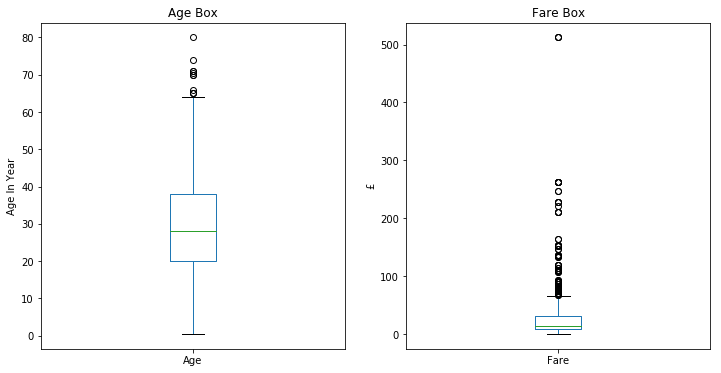

In [14]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_all = pd.read_csv('titanic-data.csv')

#展示连续字段的基本统计描述信息
print(df_all['Age'].describe(),df_all['Fare'].describe())

#绘制Age和Fare字段的箱型图，展示数据分布
fig,axes=plt.subplots(1,2)
axes[0].set_ylabel('Age In Year')
df_all['Age'].plot(figsize=(12,6),kind='box',ax=axes[0],title='Age Box')
axes[1].set_ylabel('£')
df_all['Fare'].plot(figsize=(12,6),kind='box',ax=axes[1],title='Fare Box')
plt.show()

从describe函数的结果和图形中可以看出：

* Age字段的有效值只有714个，远少于样本总数891，说明有许多缺失值，需要我们后续进一步处理；年龄分布集中在20~38岁之间；通过图形发现存在异常值，但经查这些异常值，最大80，也都在正常取值范围内，只是未在大部分值的集中范围内。

* 船票价格的结果，可以看出绝大多数乘客的票价在7.9~31的范围之内，但也有许多高达几百英镑，最多512.3292英镑的值，经过查询历史资料，我们发现这些值与年龄图形中的异常值类似，也是可信的，当时泰坦尼克号的最高票价高达800英镑，乘客中不乏当时最顶级的富豪。同时也发现了一些票价为0的情况，通过观察这些人的其他信息，他们都是在南安普顿登船，都是成年壮年的男性(年龄缺失者的称呼都是Mr)，可以推测这些人有可能都是船员，所以不需购买船票，所以这些为0的值我们暂时不做处理。

接下来来看离散类型的值，我们用分组频度图来分析他们。
需要注意的是，Name，Cabin和ticket字段基本没有重复的，我们对Name采用取其称呼作为分组依据，而对Cabin和ticket都取用前缀作为分组标准。

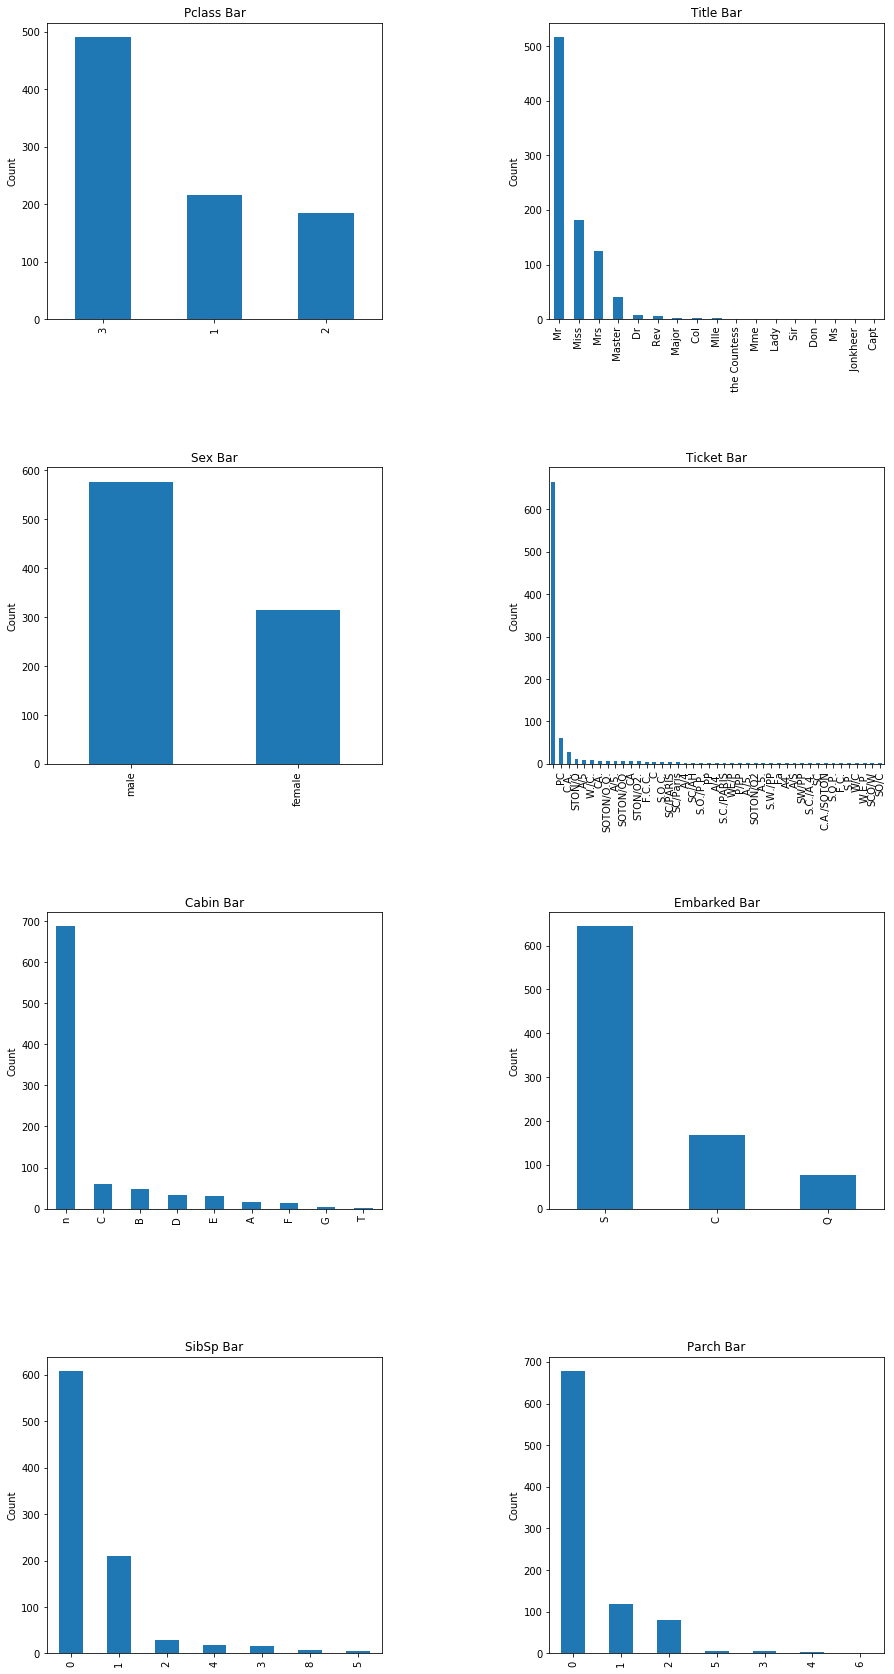

In [49]:
#Name字段提取呼处理函数
def title_from_name(name):
    titlestr=name.split(',')[1]
    return titlestr.split('.')[0]
#船票前缀处理函数
def ticket_pre(ticket):
    if ticket.count(' ') <= 0:
        return ''
    return ticket.split(' ')[0]
#船舱前缀提取函数
def cabin_pre(cabin):
    return str(cabin)[0]

#设置坐标体系
fig,axes=plt.subplots(4,2)

plt.subplots_adjust(wspace=0.5,hspace=0.5);

#绘制离散字段的直方图
def draw_bar(df,title,ylabel,ax_bar):
    ax_bar.set_ylabel(ylabel)
    df.value_counts().plot(kind='bar',ax=ax_bar,title=title,figsize=(15,30))

draw_bar(df_all.Pclass,'Pclass Bar','Count',axes[0][0])

df_all['Title'] = df_all.Name.apply(title_from_name)
draw_bar(df_all.Title,'Title Bar','Count',axes[0][1])

draw_bar(df_all.Sex,'Sex Bar','Count',axes[1][0])

df_all['Ticket_Pre'] = df_all.Ticket.apply(ticket_pre)
draw_bar(df_all.Ticket_Pre,'Ticket Bar','Count',axes[1][1])

df_all['Cabin_Pre'] = df_all.Cabin.apply(cabin_pre)
draw_bar(df_all.Cabin_Pre,'Cabin Bar','Count',axes[2][0])

draw_bar(df_all.Embarked,'Embarked Bar','Count',axes[2][1])

draw_bar(df_all.SibSp,'SibSp Bar','Count',axes[3][0])

draw_bar(df_all.Parch,'Parch Bar','Count',axes[3][1])

plt.show()

从上面诸图可以看出，我们的各个离散类型的字段有如下特征：

* 船票等级大部分集中在等级3，这与我们对票价的初步统计是相符的；
* 称呼绝大多是Mr,这与性别统计中大部分是男性，且年龄统计中大部分集中在20~38岁的结果相符；
* 船票的前缀大多为空，这应该意味着大部分乘客是全程票；
* 船舱前缀大多也为空，但通过观察原始数据集我们得知，这些都是缺失值，如此大的缺失，导致船舱字段我们可能无法用作统计之用了；
* 从登船地点可以看出，大部分乘客是在南安普顿(S)登船；
* 大部分乘客都没有随亲属一同乘船，有亲属随行者，数量也大多数在1~2名。

以上就是我们针对各个字段所做的单维度分析，已经能看出各项数据的大致分布情况，以及能反映出字段数据本身的一些质量问题，接下来我们将其中的一些项结合起来，从双维度进行一下检验分析。

* * *

## 双元素分析

双元素分析的目的是考察两个变量间的关系，我们的目的是考察哪些因素与生还率有关，因此准备从以下角度来进行：

* 年龄与是否生还的关系，因为年龄中存在大量缺失值，我们之前的处理比较草率，我们还需要首先根据称呼来为每个缺失值分配一个比较靠谱的值；
* 性别与是否生还的关系；
* 船舱等级与是否生还的关系；

首先来处理年龄缺失值问题。虽然年龄是一个连续数值，但根据我们的考察需要，作为离散的年龄段来考察更加合适。同时有一些独特但又数量较少的称谓，如"Don","Sir","Mlle"等，经过详细考据后，将其合并到合适的数量较多的称谓中去。最终的图形如下所示：

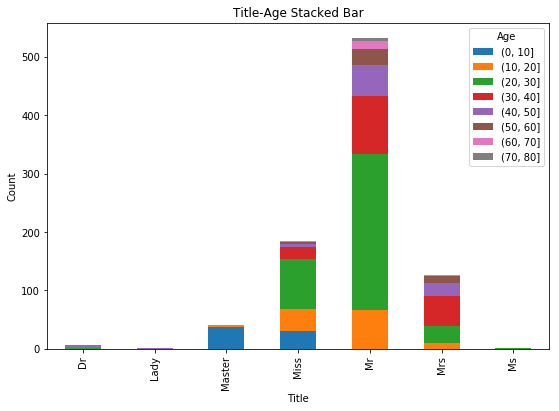

In [42]:
#合并同意义的称呼
def title_from_name(name):
    titlestr=name.split(',')[1].strip()
    title = titlestr.split('.')[0].strip()
    if title == 'Capt' or title == 'Col' or title == 'Sir' or title == 'Don' or title == 'Major' or title == 'Jonkheer' or title == 'Mme'\
    or title == 'Rev':
        title = 'Mr'
    elif title == 'Mlle':
        title = 'Miss'
    elif title == 'the Countess':
        title = 'Mrs'
    return title

df_all['Title'] = df_all.Name.apply(title_from_name)
#以栈柱形图展示称呼的年龄段覆盖情况
ax = df_all.groupby([pd.cut(df_all.Age, np.arange(0,100,10)),df_all.Title]).size().unstack(0).plot.bar(figsize=(9,6),stacked=True,title='Title-Age Stacked Bar')
ax.set_ylabel('Count')
plt.show()

可以看到，Miss,Mr,和Mrs称谓所覆盖的年龄跨度还是比较大的，我准备采用插补中位数的方式来补齐这些缺失值。中位数基本肯定不能精确地反映出真实的年龄，但是在我们目前已知的数据条件下，选择中位数能最大可能地落在正确的年龄区间中，且与真实值的误差尽可能的小，而且各项成本也比较低。

* * *

## 填充缺失值

根据我们上文的分析，具体采用以下方法来填充缺失的年龄值：

Title
Dr        46.5
Lady      48.0
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Ms        28.0
Name: Age, dtype: float64
count    891.000000
mean      29.390202
std       13.265322
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


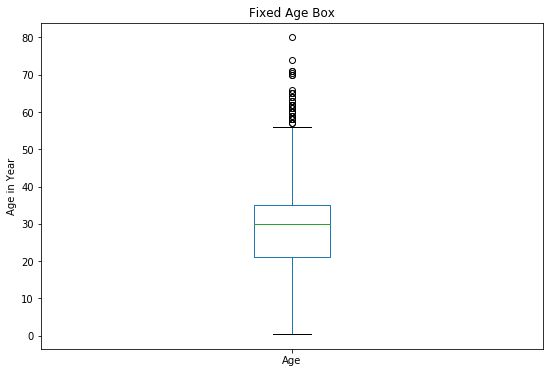

In [32]:
#求中位数
print(df_all.groupby(df_all.Title).Age.median())

def fill_missing_age(title):
    if title == 'Dr':
        return 46.5
    elif title == 'Lady':
        return 48
    elif title == 'Master':
        return 3.5
    elif title == 'Miss':
        return 21
    elif title == 'Mr':
        return 30
    elif title == 'Mrs':
        return 35
    elif title == 'Ms':
        return 28
    else:
        return 0

#填充年龄的缺失值，并以简单统计描述和图形展示修复后的结果
df_all.loc[df_all['Age'].isnull(),'Age'] = df_all['Title'].apply(fill_missing_age)

print(df_all.Age.describe())

ax = df_all['Age'].plot(kind='box',title='Fixed Age Box',figsize=(9,6))
ax.set_ylabel('Age in Year')

plt.show()

可以看到，经过填充根据Title得到的中位数处理后，我们的Age字段的基本统计描述和图形都比较正常了，可以拿来对我们的问题：年龄因素与生还率的关系，来进行进一步分析。

* * *

## 问题分析

终于进行到对我们提出的问题进行分析的阶段，我们的问题是：年龄因素/性别因素/船舱等级与生还率的关系。与分析年龄-称呼关系时类似，我们从数据类型的角度切入，先来看三组反应离散-离散关系的栈柱形图(年龄我们同样处理为离散的年龄段)。

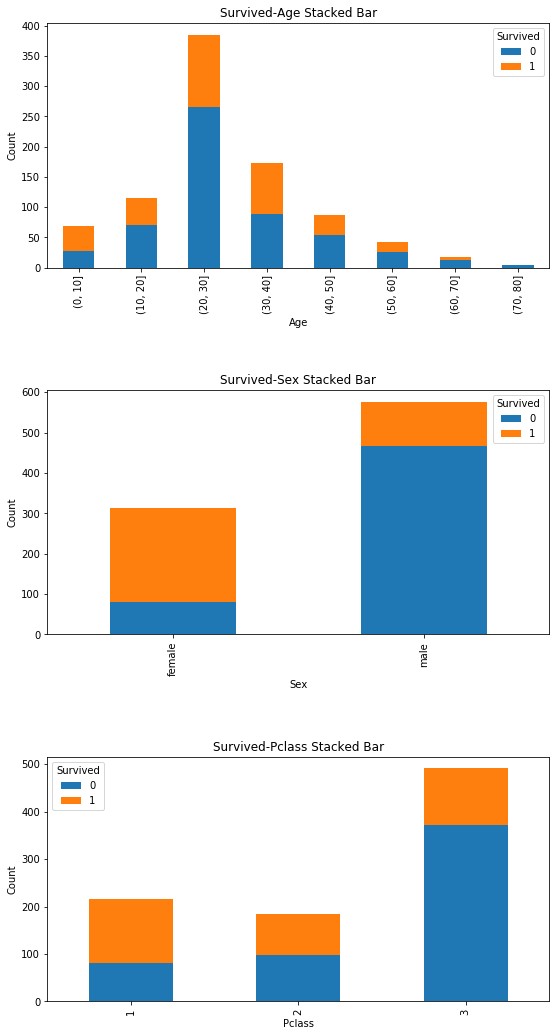

In [51]:
#绘制三组离散关系数据的栈柱形图
fig,axes=plt.subplots(3,1)

plt.subplots_adjust(hspace=0.5);

df_all.groupby([df_all.Survived,pd.cut(df_all.Age, np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True,title='Survived-Age Stacked Bar',ax=axes[0],figsize=(9,18))
axes[0].set_ylabel('Count')

df_all.groupby([df_all.Survived,df_all.Sex]).size().unstack(0).plot.bar(stacked=True,title='Survived-Sex Stacked Bar',ax=axes[1],figsize=(9,18))
axes[1].set_ylabel('Count')

df_all.groupby([df_all.Survived,df_all.Pclass]).size().unstack(0).plot.bar(stacked=True,title='Survived-Pclass Stacked Bar',ax=axes[2],figsize=(9,18))
axes[2].set_ylabel('Count')

plt.show()

从性别-生还和船舱等级-生还两张图能很直观地看出，女性组别，和1级船舱组别的生存比例高于其他组。年龄-生存关系直观上看起来不是很明显，下面我们重点从统计学的角度对年龄-生存关系加以分析，性别和船舱等级的分析方法与之类似，下文不再详细描述。


## 统计分析

我们的假设可表示为：
$$
H_0:\mu_s - \mu_v = 0
$$
其中$\mu_s$表示总体中生还者的年龄均值，$\mu_v$表示遇难者年龄均值。

具体到我们的样本中，由于是两组样本数据的对比，且自变量为年龄，是一个连续数据，基本符合正态分布，因此我们采用t检验(自由度为889，$\alpha$水平选取为0.05)来验证假设，具体可以用如下公式来计算：
$$
    t = \frac{\overline X_s - \overline X_v}{\sqrt{\frac{S_s^2}{n_s} + \frac{S_v^2}{n_v}}} = -2.3
$$

而自由度889，$\alpha$水平0.05的t双尾检验的临界值约为1.96，因此我们可以说推翻了0假设，即生还者和遇难者间的年龄是有显著差异的。

* * *

## 结论回顾

在得出了结论之后，我们试着来分析下这一结论的合理性。

* 首先从我们自身的分析过程中就能看出，除了年龄，性别和船舱等级也是影响生存的重要因素，我们针对年龄的统计中并没有刻意去除这两项条件的影响，这对结论的可信度是有影响的；
* 针对年龄数据本身的缺失问题，我们选择了根据称呼用中位数填充，这种方式会选择占比最大的年龄段中的某个值，但显然与实际的分布是不符的，会让已知占比大的年龄段的影响更大；
* 此外还有许多没有在样本数据集中反应出来的因素，也会对生存产生影响，例如我们知道有些救生艇是满载的，有些救生艇则未坐满，所以等待救援的位置也会对是否生还产生影响